In [39]:
from mpl_toolkits.mplot3d import Axes3D

### 1. Préparation / visualisation 

In [1]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt

def read_file( filename ):
    """
    Lit un fichier USPS et renvoie un tableau de tableaux d'images.
    Chaque image est un tableau de nombres réels.
    Chaque tableau d'images contient des images de la même classe.
    Ainsi, T = read_file ( "fichier" ) est tel que T[0] est le tableau
    des images de la classe 0, T[1] contient celui des images de la classe 1,
    et ainsi de suite.
    """
    # lecture de l'en-tête
    infile = open ( filename, "r" )    
    nb_classes, nb_features = [ int( x ) for x in infile.readline().split() ]

    # creation de la structure de données pour sauver les images :
    # c'est un tableau de listes (1 par classe)
    data = np.empty ( 10, dtype=object )  
    filler = np.frompyfunc(lambda x: list(), 1, 1)
    filler( data, data )

    # lecture des images du fichier et tri, classe par classe
    for ligne in infile:
        champs = ligne.split ()
        if len ( champs ) == nb_features + 1:
            classe = int ( champs.pop ( 0 ) )
            data[classe].append ( list ( map ( lambda x: float(x), champs ) ) )
    infile.close ()

    # transformation des list en array
    output  = np.empty ( 10, dtype=object )
    filler2 = np.frompyfunc(lambda x: np.asarray (x), 1, 1)
    filler2 ( data, output )

    return output

def display_image ( X ):
    """
    Etant donné un tableau X de 256 flotants représentant une image de 16x16
    pixels, la fonction affiche cette image dans une fenêtre.
    """
    # on teste que le tableau contient bien 256 valeurs
    if X.size != 256:
        raise ValueError ( "Les images doivent être de 16x16 pixels" )

    # on crée une image pour imshow: chaque pixel est un tableau à 3 valeurs
    # (1 pour chaque canal R,G,B). Ces valeurs sont entre 0 et 1
    Y = X / X.max ()
    img = np.zeros ( ( Y.size, 3 ) )
    for i in range ( 3 ):
        img[:,i] = X

    # on indique que toutes les images sont de 16x16 pixels
    img.shape = (16,16,3)

    # affichage de l'image
    plt.imshow( img )
    plt.show ()

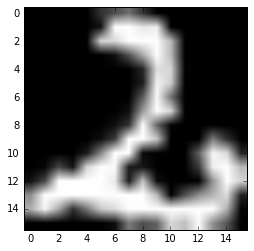

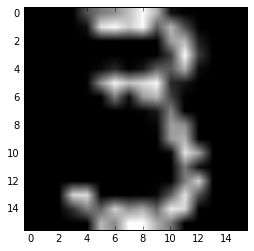

In [2]:
training_data = read_file ( "2015_tme3_usps_train.txt" )

# affichage du 1er chiffre "2" de la base:
display_image (training_data[2][0])

# affichage du 5ème chiffre "3" de la base:
display_image (training_data[3][4])

### 2. Maximum de vraisemblance pour une classe 

In [3]:
def learnML_class_parameters(classe):
    T = []
    mus = []
    sigmas = []
    mus = np.mean(classe,0)
    sigmas = np.var(classe,0)
    sigmas = np.where(sigmas==0, 1, sigmas) 
    return mus,sigmas
    

In [4]:
learnML_class_parameters(training_data[0])

(array([1.37185930e-03, 4.60217755e-03, 1.50770519e-02, 5.87487437e-02,
        1.66657454e-01, 4.28577052e-01, 8.68415410e-01, 1.15260804e+00,
        1.04628392e+00, 6.46298995e-01, 2.58751256e-01, 7.90837521e-02,
        1.49748744e-02, 2.81742044e-03, 6.53266332e-05, 0.00000000e+00,
        1.76549414e-03, 6.53433836e-03, 5.00293132e-02, 1.88505863e-01,
        5.10424623e-01, 1.06171608e+00, 1.52639280e+00, 1.68250000e+00,
        1.63088945e+00, 1.39957621e+00, 9.51082915e-01, 4.20636516e-01,
        1.27508375e-01, 3.08886097e-02, 3.20016750e-03, 5.02512563e-06,
        3.31825796e-03, 2.71273032e-02, 1.36604690e-01, 4.37097152e-01,
        9.42998325e-01, 1.43772194e+00, 1.62785260e+00, 1.61645645e+00,
        1.55001340e+00, 1.51951173e+00, 1.37973953e+00, 9.38602178e-01,
        4.34310720e-01, 1.22752094e-01, 2.15100503e-02, 1.88525963e-03,
        6.25460637e-03, 6.85695142e-02, 3.10753769e-01, 7.81501675e-01,
        1.29654858e+00, 1.53751340e+00, 1.44771859e+00, 1.211631

In [5]:
learnML_class_parameters(training_data[1])

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.98009950e-06, 1.27223881e-02, 3.64843781e-01, 1.47724776e+00,
        9.99703483e-01, 1.18331343e-01, 4.97313433e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.11442786e-04, 2.29164179e-02, 4.97605970e-01, 1.80326368e+00,
        1.68735622e+00, 3.85793035e-01, 2.02776119e-02, 3.90049751e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.14427861e-03, 2.39064677e-02, 5.16177114e-01, 1.84452239e+00,
        1.83539502e+00, 5.21406965e-01, 3.97134328e-02, 4.73631841e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.98009950e-04,
        2.14825871e-03, 2.78109453e-02, 5.24138308e-01, 1.843859

###  3. Maximum de vraisemblance pour toutes les classes 

In [6]:
def learnML_all_parameters(X_train):
    return [learnML_class_parameters(c) for c in X_train ]

parameters = learnML_all_parameters(training_data)

In [7]:
parameters

[(array([1.37185930e-03, 4.60217755e-03, 1.50770519e-02, 5.87487437e-02,
         1.66657454e-01, 4.28577052e-01, 8.68415410e-01, 1.15260804e+00,
         1.04628392e+00, 6.46298995e-01, 2.58751256e-01, 7.90837521e-02,
         1.49748744e-02, 2.81742044e-03, 6.53266332e-05, 0.00000000e+00,
         1.76549414e-03, 6.53433836e-03, 5.00293132e-02, 1.88505863e-01,
         5.10424623e-01, 1.06171608e+00, 1.52639280e+00, 1.68250000e+00,
         1.63088945e+00, 1.39957621e+00, 9.51082915e-01, 4.20636516e-01,
         1.27508375e-01, 3.08886097e-02, 3.20016750e-03, 5.02512563e-06,
         3.31825796e-03, 2.71273032e-02, 1.36604690e-01, 4.37097152e-01,
         9.42998325e-01, 1.43772194e+00, 1.62785260e+00, 1.61645645e+00,
         1.55001340e+00, 1.51951173e+00, 1.37973953e+00, 9.38602178e-01,
         4.34310720e-01, 1.22752094e-01, 2.15100503e-02, 1.88525963e-03,
         6.25460637e-03, 6.85695142e-02, 3.10753769e-01, 7.81501675e-01,
         1.29654858e+00, 1.53751340e+00, 1.44771859

### 4. Log-vraisemblance d'une image 

In [8]:
def log_likelihood(img, parameters):
    return sum([(-1/2)*np.log(2*np.pi*parameters[1][i]) - (1/2)*((img[i] - parameters[0][i])**2)/parameters[1][i] for i in range(len(img))])

In [9]:
parameters = learnML_all_parameters ( training_data )
test_data = read_file ( "2015_tme3_usps_test.txt" )

In [10]:
[ log_likelihood ( test_data[0][0], parameters[i] ) for i in range ( 10 ) ]

[-82.43218654741057,
 -2030714471.6694458,
 -341.54749258514425,
 -373.9778527373253,
 -682.7594857491727,
 -364.62227994586954,
 -720.045521161378,
 -344313.97155078716,
 -504.47628373747926,
 -35437.722453500195]

###  5. Log-vraisemblance d'une image (bis) 

In [11]:
def log_likelihoods(img, parameters):
    return np.array([log_likelihood(img, parameters[i]) for i in range (10)])

In [12]:
log_likelihoods ( test_data[1][5], parameters )

array([-891.06296094,   93.05671697, -187.13376835, -265.13424326,
       -154.14273954, -215.85994204,  -99.46434978, -276.74330201,
       -123.54639371,  -88.1378964 ])

### 6. Classification d'une image 

In [13]:
def classify_image(img, parameters):
    return np.argmax(log_likelihoods(img, parameters))

In [14]:
classify_image( test_data[1][5], parameters )

1

In [15]:
classify_image( test_data[4][1], parameters )

9

### 7. Classification de toutes les images 

In [36]:
def classify_all_images(X_test, parameters):
    T = []
    for i in range(X_test.size):
        T.append([0]*X_test.size)
    for c in range(X_test.size):
        for img in X_test[c]:
            pred = classify_image(img,parameters)
            T[c][pred] += 1
    for i in range(X_test.size):
        n = sum(T[i])
        for j in range(X_test.size):
            T[i][j] = T[i][j] / n
    return T

In [37]:
T = classify_all_images(test_data, parameters)

In [38]:
print(T[0][0])
print(T[2][3])
print(T[5][3])

0.8523676880222841
0.04040404040404041
0.0625


### 8. Affichage du résultat des classifications 

In [40]:
def dessine ( classified_matrix ):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = y = np.linspace ( 0, 9, 10 )
    X, Y = np.meshgrid(x, y)
    ax.plot_surface(X, Y, classified_matrix, rstride = 1, cstride=1 )

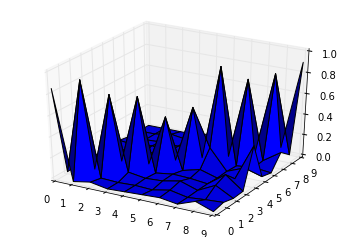

In [42]:
dessine(T)